In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker
import os
import csv

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241212_145945.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241212_145945.braidz using pyarrow


In [3]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0             0   337594  1.734012e+09 -0.139745  0.027730  0.227851   
 1             0   337595  1.734012e+09 -0.135982  0.028291  0.227017   
 2             0   337596  1.734012e+09 -0.133746  0.029170  0.225395   
 3             0   337597  1.734012e+09 -0.131960  0.030345  0.223647   
 4             0   337598  1.734012e+09 -0.130246  0.031660  0.222073   
 ...         ...      ...           ...       ...       ...       ...   
 2888631   25231  8020335  1.734089e+09  0.031399 -0.181485  0.314332   
 2888632   25231  8020336  1.734089e+09  0.030681 -0.182737  0.314338   
 2888633   25231  8020337  1.734089e+09  0.029947 -0.183924  0.314260   
 2888634   25231  8020338  1.734089e+09  0.029284 -0.184941  0.314113   
 2888635   25231  8020339  1.734089e+09  0.028505 -0.185789  0.314117   
 
              xvel      yvel      zvel           P00           P01  \
 0        0.305516 -0.012485 -0.131321  1.083981e-07

In [4]:
data = extract_stimulus_centered_data(df, csvs["opto"])
AngVel_Second_Repeat = data["angular_velocity"]


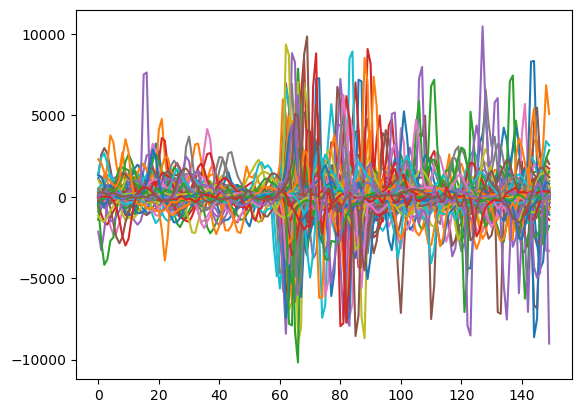

In [5]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

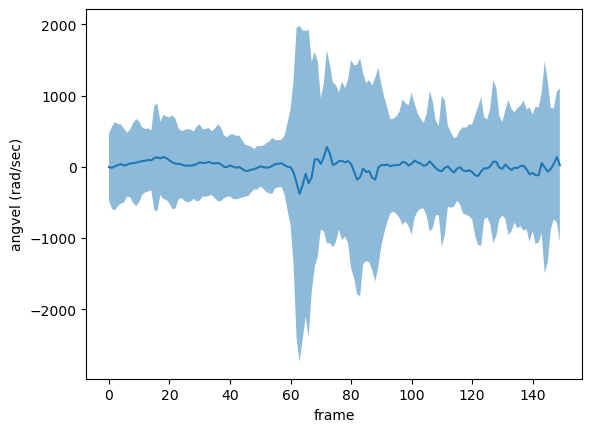

In [6]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

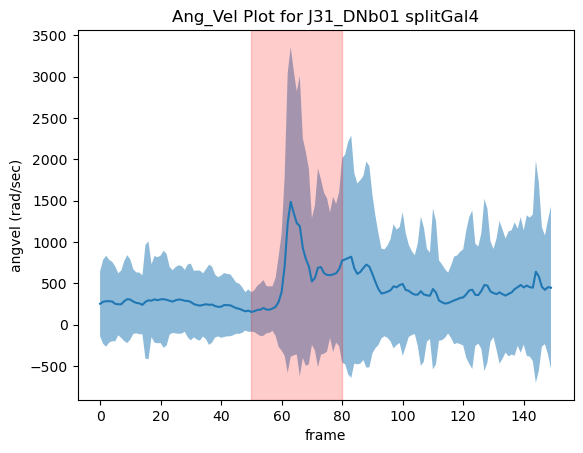

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.2)
ax.set_title("Ang_Vel Plot for J31_DNb01 splitGal4")
plt.show()

In [8]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241210_140025.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241210_140025.braidz using pyarrow


In [9]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0             0    96052  1.733836e+09  0.110656  0.025840  0.113201   
 1             0    96053  1.733836e+09  0.110569  0.024798  0.113295   
 2             0    96054  1.733836e+09  0.110646  0.023683  0.113677   
 3             0    96055  1.733836e+09  0.110466  0.022728  0.113696   
 4             0    96056  1.733836e+09  0.110505  0.021584  0.114033   
 ...         ...      ...           ...       ...       ...       ...   
 5370438   57865  7642678  1.733911e+09 -0.074399 -0.184797  0.315044   
 5370439   57865  7642679  1.733911e+09 -0.074276 -0.185232  0.316705   
 5370440   57865  7642680  1.733911e+09 -0.074191 -0.185536  0.318847   
 5370441   57865  7642681  1.733911e+09 -0.074141 -0.185767  0.321551   
 5370442   57865  7642682  1.733911e+09 -0.074062 -0.185797  0.324188   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.010529 -0.096444  0.004224  7.514818e-08

In [10]:
data1 = extract_stimulus_centered_data(df,csvs["opto"])
AngVel_First_Repeat = data1["angular_velocity"]

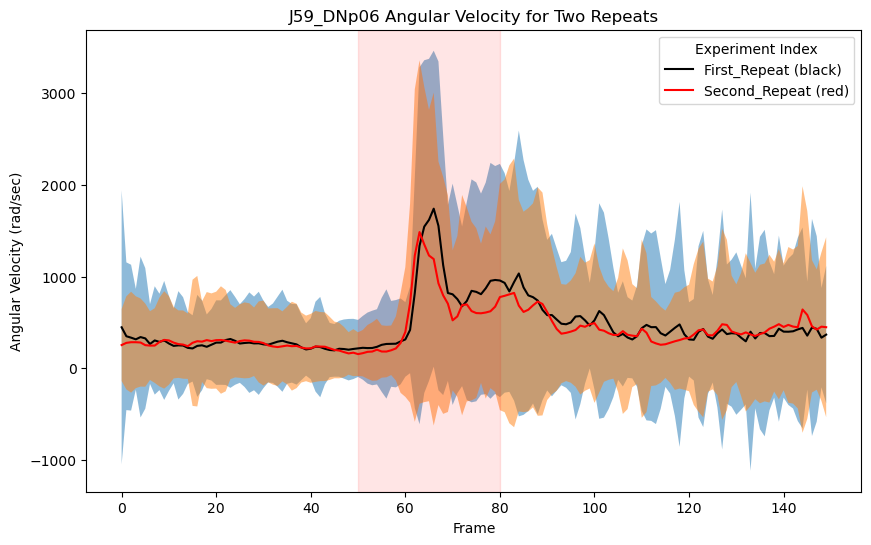

In [11]:
import numpy as np
import matplotlib.pyplot as plt


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the angular velocities with mean and std and adding labels directly
plot_mean_and_std(np.abs(AngVel_First_Repeat), ax=ax, label='First_Repeat (black)', color='black')
plot_mean_and_std(np.abs(AngVel_Second_Repeat), ax=ax, label='Second_Repeat (red)', color='red')

# Adding labels and title
ax.set_xlabel("Frame")
ax.set_ylabel("Angular Velocity (rad/sec)")
ax.set_title("J59_DNp06 Angular Velocity for Two Repeats")

ax.axvspan(50, 80, color='red', alpha=0.1)

# Adding the legend to identify each curve
ax.legend(title="Experiment Index")

# Show the plot
plt.show()

In [12]:
AngVel_DNp06 = np.concatenate([AngVel_First_Repeat, AngVel_Second_Repeat])

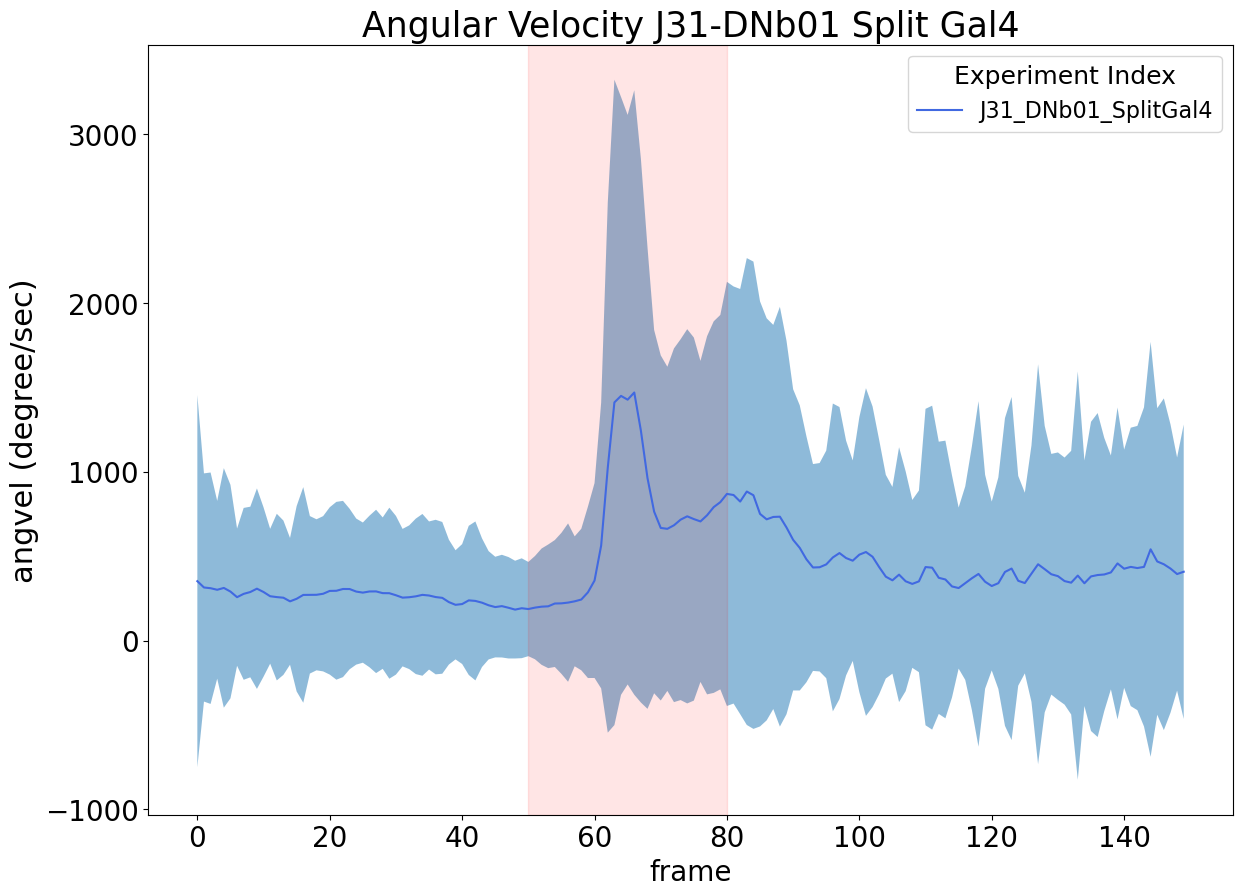

In [13]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_mean_and_std(np.abs(AngVel_DNp06), ax=ax, label='J31_DNb01_SplitGal4', color='royalblue')
ax.set_xlabel("frame", fontsize = 20)
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot")


ax.axvspan(50, 80, color='red', alpha=0.1)
plt.legend(title="Experiment Index", fontsize=16, title_fontsize=18)

plt.title("Angular Velocity J31-DNb01 Split Gal4", fontsize=25)
plt.ylabel("angvel (degree/sec)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)


In [15]:
Position = data['position']
print(type(data['position']))



<class 'list'>


In [16]:
outer_length = len(data['position'])
print("Number of elements in the outer list:", outer_length)


Number of elements in the outer list: 146


In [17]:
if outer_length > 0 and isinstance(data['position'][0], list):
    inner_length = len(data['position'][0])
    print("Length of the first inner list:", inner_length)
else:
    print("The list is not nested.")

The list is not nested.


In [18]:
print("Shape of data['position']:", (len(data['position']),))


Shape of data['position']: (146,)


In [21]:
import numpy as np
position_array = np.array(data['position'])
print("Numpy array shape:", position_array.shape)


Numpy array shape: (146, 150, 3)


In [23]:
import numpy as np

# Convert data['position'] to a NumPy array if it's still a list
position_array = np.array(data['position'])

# Now you can slice the data
pre_stimulus = position_array[:, 0:50, :]  # Frames 0 to 49
stimulus = position_array[:, 50:80, :]    # Frames 50 to 79
post_stimulus = position_array[:, 80:150, :]  # Frames 80 to 149

# Print shapes for verification
print("Pre-stimulus shape:", pre_stimulus.shape)
print("Stimulus shape:", stimulus.shape)
print("Post-stimulus shape:", post_stimulus.shape)



Pre-stimulus shape: (146, 50, 3)
Stimulus shape: (146, 30, 3)
Post-stimulus shape: (146, 70, 3)


In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [25]:
# Extract ranges for all recordings
pre_stimulus = position_array[:, 0:50, :]
stimulus = position_array[:, 50:80, :]
post_stimulus = position_array[:, 80:150, :]

# Flatten the data for easy plotting
pre_stimulus_flat = pre_stimulus.reshape(-1, 3)  # (146*50, 3)
stimulus_flat = stimulus.reshape(-1, 3)          # (146*30, 3)
post_stimulus_flat = post_stimulus.reshape(-1, 3)  # (146*70, 3)

# Extract X, Y, Z values
x_pre, y_pre, z_pre = pre_stimulus_flat[:, 0], pre_stimulus_flat[:, 1], pre_stimulus_flat[:, 2]
x_stim, y_stim, z_stim = stimulus_flat[:, 0], stimulus_flat[:, 1], stimulus_flat[:, 2]
x_post, y_post, z_post = post_stimulus_flat[:, 0], post_stimulus_flat[:, 1], post_stimulus_flat[:, 2]


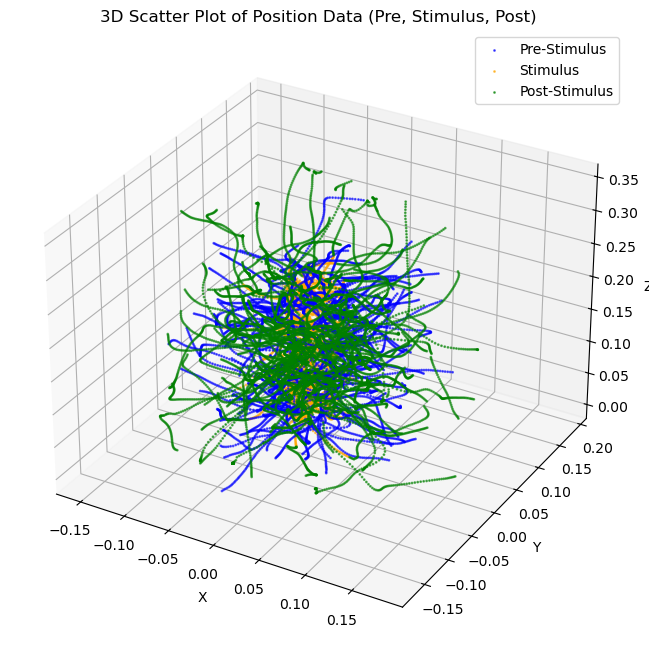

In [26]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each range with different colors
ax.scatter(x_pre, y_pre, z_pre, c='blue', label='Pre-Stimulus', alpha=0.6, s=1)
ax.scatter(x_stim, y_stim, z_stim, c='orange', label='Stimulus', alpha=0.6, s=1)
ax.scatter(x_post, y_post, z_post, c='green', label='Post-Stimulus', alpha=0.6, s=1)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Position Data (Pre, Stimulus, Post)')

# Add legend
ax.legend()

# Show the plot
plt.show()


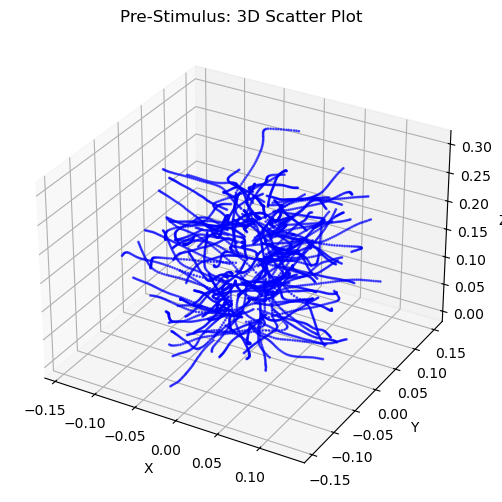

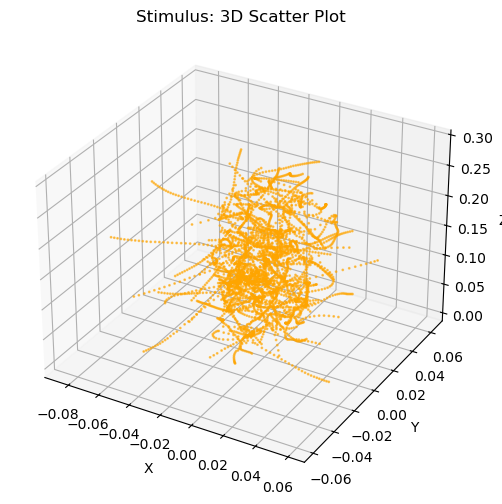

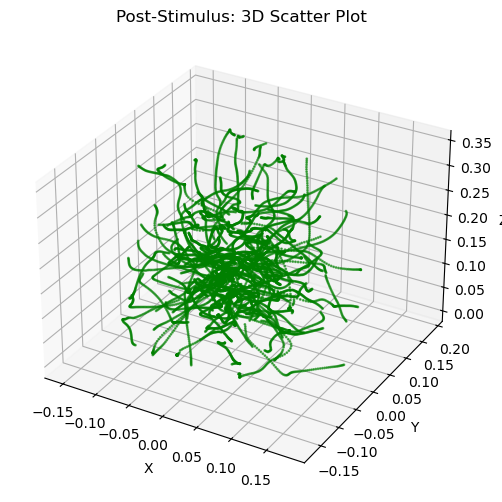

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a separate 3D scatter plot for each range

# Pre-stimulus Plot
fig_pre = plt.figure(figsize=(8, 6))
ax_pre = fig_pre.add_subplot(111, projection='3d')
ax_pre.scatter(x_pre, y_pre, z_pre, c='blue', alpha=0.6, s=1)
ax_pre.set_xlabel('X')
ax_pre.set_ylabel('Y')
ax_pre.set_zlabel('Z')
ax_pre.set_title('Pre-Stimulus: 3D Scatter Plot')
plt.show()

# Stimulus Plot
fig_stim = plt.figure(figsize=(8, 6))
ax_stim = fig_stim.add_subplot(111, projection='3d')
ax_stim.scatter(x_stim, y_stim, z_stim, c='orange', alpha=0.6, s=1)
ax_stim.set_xlabel('X')
ax_stim.set_ylabel('Y')
ax_stim.set_zlabel('Z')
ax_stim.set_title('Stimulus: 3D Scatter Plot')
plt.show()

# Post-stimulus Plot
fig_post = plt.figure(figsize=(8, 6))
ax_post = fig_post.add_subplot(111, projection='3d')
ax_post.scatter(x_post, y_post, z_post, c='green', alpha=0.6, s=1)
ax_post.set_xlabel('X')
ax_post.set_ylabel('Y')
ax_post.set_zlabel('Z')
ax_post.set_title('Post-Stimulus: 3D Scatter Plot')
plt.show()


In [28]:
# Centroid (Mean Position) for each range
centroid_pre = np.mean(pre_stimulus_flat, axis=0)  # Mean of x, y, z
centroid_stim = np.mean(stimulus_flat, axis=0)
centroid_post = np.mean(post_stimulus_flat, axis=0)

print(f"Pre-Stimulus Centroid (X, Y, Z): {centroid_pre}")
print(f"Stimulus Centroid (X, Y, Z): {centroid_stim}")
print(f"Post-Stimulus Centroid (X, Y, Z): {centroid_post}")


Pre-Stimulus Centroid (X, Y, Z): [ 0.00412288 -0.0016173   0.14671294]
Stimulus Centroid (X, Y, Z): [-0.00125358 -0.00037916  0.14295701]
Post-Stimulus Centroid (X, Y, Z): [ 0.00128018 -0.002462    0.151238  ]


In [29]:
# Standard deviation for each range
std_pre = np.std(pre_stimulus_flat, axis=0)
std_stim = np.std(stimulus_flat, axis=0)
std_post = np.std(post_stimulus_flat, axis=0)

print(f"Pre-Stimulus Standard Deviation (X, Y, Z): {std_pre}")
print(f"Stimulus Standard Deviation (X, Y, Z): {std_stim}")
print(f"Post-Stimulus Standard Deviation (X, Y, Z): {std_post}")


Pre-Stimulus Standard Deviation (X, Y, Z): [0.04828624 0.04807575 0.07421865]
Stimulus Standard Deviation (X, Y, Z): [0.01821737 0.01783003 0.06173584]
Post-Stimulus Standard Deviation (X, Y, Z): [0.05444867 0.05595994 0.0721428 ]


In [30]:
# Maximum distance from centroid
def max_distance_from_centroid(data, centroid):
    distances = np.linalg.norm(data - centroid, axis=1)  # Euclidean distance
    return np.max(distances)

max_dist_pre = max_distance_from_centroid(pre_stimulus_flat, centroid_pre)
max_dist_stim = max_distance_from_centroid(stimulus_flat, centroid_stim)
max_dist_post = max_distance_from_centroid(post_stimulus_flat, centroid_post)

print(f"Pre-Stimulus Maximum Distance from Centroid: {max_dist_pre}")
print(f"Stimulus Maximum Distance from Centroid: {max_dist_stim}")
print(f"Post-Stimulus Maximum Distance from Centroid: {max_dist_post}")


Pre-Stimulus Maximum Distance from Centroid: 0.19488277655452488
Stimulus Maximum Distance from Centroid: 0.14624934186482888
Post-Stimulus Maximum Distance from Centroid: 0.24680650192638104


In [31]:
# Path length for each range
def path_length(data):
    distances = np.linalg.norm(np.diff(data, axis=0), axis=1)  # Summing the distances between consecutive points
    return np.sum(distances)

path_pre = path_length(pre_stimulus_flat)
path_stim = path_length(stimulus_flat)
path_post = path_length(post_stimulus_flat)

print(f"Pre-Stimulus Path Length: {path_pre}")
print(f"Stimulus Path Length: {path_stim}")
print(f"Post-Stimulus Path Length: {path_post}")


Pre-Stimulus Path Length: 34.88499092027517
Stimulus Path Length: 20.200747534556292
Post-Stimulus Path Length: 40.23367097355031
